In [164]:
pwd()


'/home/mbousso'

In [204]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

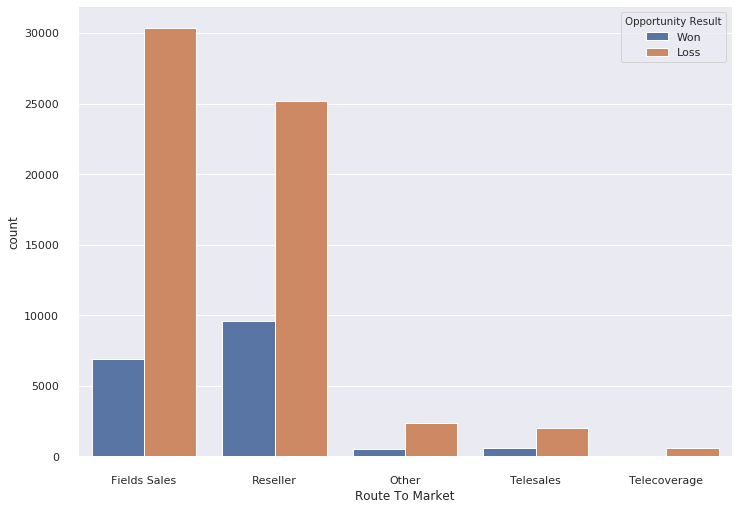

In [205]:

# import the matplotlib module
import matplotlib.pyplot as plt
sales_data = pd.read_csv("../reference/WA_Fn-UseC_-Sales-Win-Loss.csv")
#print(sales_data.head())
#print(sales_data.shape)
# set the background colour of the plot to white
sns.set(style="whitegrid", color_codes=True)
# setting the plot size for all plots
sns.set(rc={'figure.figsize':(11.7,8.27)})
# create a countplot
sns.countplot('Route To Market',data=sales_data,hue = 'Opportunity Result')
# Remove the top and down margin
sns.despine(offset=10, trim=True)
# display the plot
plt.show()

In [206]:
import csv


def  count_cols_csv(pivigo_csv_files,delimiter):
    '''
    Count the number of columns of a csv file 
    input: the csv file and its delimiter
    return: number of columns of the csv file 
    '''
    num_col = 0
    try:
        with open(pivigo_csv_files,'r') as f1:
        
            first_line = f1.readline()
            num_col = first_line.count(delimiter)+1
    except Exception as ex:
        print(ex)
        return('Number of columns undefined')
    
    return num_col
#print(count_cols_csv('./Documents/Pivigoprojec/IQ109215_quarterly_income_statement.csv',','))

In [207]:
#test_data = pd.read_csv('./Documents/Pivigoproject/IQ34509_quarterly_income_statement.csv', header = None , parse_dates=[i for i in range (84) if i != 0 or i%2 == 0])
def transform_header_dates(pivigo_csv_file, delimiter):
    '''
    Transform columns containing date information based on that these are even columns
    input: file name and delimiter
    output: dataframe with dates columns parsed to DateTime type
    
    '''
    
    try:
        num_cols = count_cols_csv(pivigo_csv_file,delimiter)
        return pd.read_csv(pivigo_csv_file, header = None, parse_dates =[i for i in range(num_cols) if i!= 0 or i%2 == 0] )
    except Exception as ex:
        print(ex)

#test_data = transform_header_dates('./Documents/Pivigoproject/IQ159857_quarterly_income_statement.csv',',')
#test_data.head()

In [208]:
def get_file_identifier(df):
    '''
    return the identifier of a file
    input: dataframe
    output:String representing the identifier of a file
    '''
    try:
        return df.iloc[0,0]
    except Exception as ex:
        print(ex)
#print(get_file_identifier(test_data))

In [209]:
def getListOfDates(df, row_index):
    '''
    Get all the dates in a file in Date format
    inputs: A datframe containing the data of a file and a index of a row 
    output: The list of all the dates in the file
    Exception: The row index doesn"t exist or the dataframe doesn't exist
    '''
    row = (df.iloc[row_index]).iloc[2:]
    return pd.Series([row.iloc[i] for i in range(len(row)) if i%2 == 0])

#print(getListOfDatesOfFile(test_data,2))

In [210]:
import re
def getIndicatorsValues(df,row_index):
    row = (df.iloc[row_index]).iloc[2:]
    list_values = [row.iloc[i] for i in range(len(row)) if i%2==1]
    for i in range(len(list_values)):
        if re.findall("[a-zA-Z]",list_values[i]):
            list_values[i] = np.NaN
        else:
            list_values[i] = float(list_values[i])
    return pd.Series(list_values)
#print(getIndicatorsValues(test_data,2))

In [211]:
def getIndicatorName(df, row_index):
    return (df.iloc[row_index]).iloc[1]
#print(getIndicatorName(test_data,2))

In [212]:

#Create a dictionnary with Date and Indicators values
def getDataDict(df):
    datadict = {}
    name = get_file_identifier(df)
    datadict["Dates"]= getListOfDates(df,0)
    for i in range(df.shape[0]):
        datadict[name+"_"+getIndicatorName(df,i)]= getIndicatorsValues(df,i)
    return datadict


In [213]:
# Take a  file, get a new dataframe with indicators in columns and dates as index
def fileToDf(pivigo_file,delimiter=','):
    df =  transform_header_dates(pivigo_file,delimiter)
    df_dict = getDataDict(df)
    return pd.DataFrame(df_dict).set_index('Dates')

df = fileToDf('./Documents/Pivigoproject/IQ34102981_quarterly_income_statement.csv')

In [214]:
df.head()

,IQ34102981_IQ_EBIT,IQ34102981_IQ_OTHER_UNUSUAL_SUPPL,IQ34102981_IQ_NI_COMPANY,IQ34102981_IQ_RESTRUCTURE,IQ34102981_IQ_COST_REV,IQ34102981_IQ_OTHER_OPER,IQ34102981_IQ_RD_EXP_FN,IQ34102981_IQ_DILUT_EPS_EXCL,IQ34102981_IQ_EBITDA_EXCL_SBC,IQ34102981_IQ_NI_NORM,...,IQ34102981_IQ_TOTAL_UNUSUAL_SUPPLE,IQ34102981_IQ_PERIODLENGTH_IS,IQ34102981_IQ_EBT,IQ34102981_IQ_EBITA,IQ34102981_IQ_OTHER_NON_OPER_EXP_SUPPL,IQ34102981_IQ_EBITA_EXCL_SBC,IQ34102981_IQ_DILUT_EPS_NORM,IQ34102981_IQ_RESTATEMENT_IS,IQ34102981_IQ_TOTAL_REV_SHARE,IQ34102981_IQ_EBITA_EQ_INC_EXCL_SBC
Dates,,,,,,,,,,,,,,,,,,,,,
2010-04-08,20.692,NaN,16.438,NaN,75.137,40.656,NaN,1.628169,23.128,14.341250,...,NaN,3.0,22.954,20.855,0.196,21.640,1.420488,NaN,15.458696,21.640
2010-05-11,20.370,NaN,15.573,NaN,125.745,15.295,NaN,1.540000,22.002,13.592500,...,NaN,3.0,21.748,20.534,0.351,20.534,1.340181,NaN,16.185024,20.534
2010-08-26,15.100,NaN,11.049,NaN,113.215,16.801,NaN,1.090000,17.031,9.862500,...,NaN,3.0,15.780,15.264,-0.033,15.618,0.972414,NaN,14.562075,15.618
2010-11-09,6.930,NaN,5.285,NaN,93.557,17.760,NaN,0.519999,8.879,4.680625,...,NaN,3.0,7.489,7.094,0.091,7.500,0.461496,NaN,11.891439,7.500
2011-05-04,14.686,NaN,10.571,NaN,80.239,41.730,NaN,1.030122,16.515,9.603125,...,NaN,3.0,15.365,14.686,0.202,15.063,0.941944,NaN,15.770973,15.063


In [215]:
df.dtypes

IQ34102981_IQ_EBIT                         float64
IQ34102981_IQ_OTHER_UNUSUAL_SUPPL          float64
IQ34102981_IQ_NI_COMPANY                   float64
IQ34102981_IQ_RESTRUCTURE                  float64
IQ34102981_IQ_COST_REV                     float64
IQ34102981_IQ_OTHER_OPER                   float64
IQ34102981_IQ_RD_EXP_FN                    float64
IQ34102981_IQ_DILUT_EPS_EXCL               float64
IQ34102981_IQ_EBITDA_EXCL_SBC              float64
IQ34102981_IQ_NI_NORM                      float64
IQ34102981_IQ_NI                           float64
IQ34102981_IQ_TOTAL_REV                    float64
IQ34102981_IQ_EBIT_EQ_INC_EXCL_SBC         float64
IQ34102981_IQ_TOTAL_OTHER_OPER             float64
IQ34102981_IQ_SAME_STORE                   float64
IQ34102981_IQ_RESTRUCTURE_SUPPLE           float64
IQ34102981_IQ_DA_EBITDA                    float64
IQ34102981_IQ_NI_AVAIL_INCL                float64
IQ34102981_IQ_EBITDA_EQ_INC                float64
IQ34102981_IQ_EARNING_PARENT_EX

In [216]:
#Check Missing Data
df.isnull().sum()

IQ34102981_IQ_EBIT                          0
IQ34102981_IQ_OTHER_UNUSUAL_SUPPL          41
IQ34102981_IQ_NI_COMPANY                    0
IQ34102981_IQ_RESTRUCTURE                  41
IQ34102981_IQ_COST_REV                      0
IQ34102981_IQ_OTHER_OPER                    0
IQ34102981_IQ_RD_EXP_FN                    37
IQ34102981_IQ_DILUT_EPS_EXCL                0
IQ34102981_IQ_EBITDA_EXCL_SBC               0
IQ34102981_IQ_NI_NORM                       0
IQ34102981_IQ_NI                            0
IQ34102981_IQ_TOTAL_REV                     0
IQ34102981_IQ_EBIT_EQ_INC_EXCL_SBC          0
IQ34102981_IQ_TOTAL_OTHER_OPER              0
IQ34102981_IQ_SAME_STORE                   41
IQ34102981_IQ_RESTRUCTURE_SUPPLE           41
IQ34102981_IQ_DA_EBITDA                     0
IQ34102981_IQ_NI_AVAIL_INCL                 0
IQ34102981_IQ_EBITDA_EQ_INC                 0
IQ34102981_IQ_EARNING_PARENT_EXCL_EXTRA     0
IQ34102981_IQ_OTHER_REV                    41
IQ34102981_IQ_DISTRIBUTABLE_CASH  

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41 entries, 2010-04-08 to 2019-04-26
Data columns (total 77 columns):
IQ34102981_IQ_EBIT                               41 non-null float64
IQ34102981_IQ_OTHER_UNUSUAL_SUPPL                0 non-null float64
IQ34102981_IQ_NI_COMPANY                         41 non-null float64
IQ34102981_IQ_RESTRUCTURE                        0 non-null float64
IQ34102981_IQ_COST_REV                           41 non-null float64
IQ34102981_IQ_OTHER_OPER                         41 non-null float64
IQ34102981_IQ_RD_EXP_FN                          4 non-null float64
IQ34102981_IQ_DILUT_EPS_EXCL                     41 non-null float64
IQ34102981_IQ_EBITDA_EXCL_SBC                    41 non-null float64
IQ34102981_IQ_NI_NORM                            41 non-null float64
IQ34102981_IQ_NI                                 41 non-null float64
IQ34102981_IQ_TOTAL_REV                          41 non-null float64
IQ34102981_IQ_EBIT_EQ_INC_EXCL_SBC               41 

In [218]:
#Drop columns with all 
#df.dropna(how='all', axis=1,inplace=True)
#df.dropna(thresh=7,axis=1,inplace=True)
#df.info()
def dropColumnsWithNaPercentage(df,percentage):
    """
    Drop columns with a threshold percentage of NaN Data
    Input: The dataframe  and the percentage
    No output
    """
    print(df.shape[1])
    numberna = df.shape[1] - int(df.shape[1]- percentage*df.shape[1]/100)
    print(numberna)
    df.dropna(thresh = numberna,axis = 1, inplace = True )

dropColumnsWithNaPercentage(df,10)
df.info()

77
8
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41 entries, 2010-04-08 to 2019-04-26
Data columns (total 56 columns):
IQ34102981_IQ_EBIT                         41 non-null float64
IQ34102981_IQ_NI_COMPANY                   41 non-null float64
IQ34102981_IQ_COST_REV                     41 non-null float64
IQ34102981_IQ_OTHER_OPER                   41 non-null float64
IQ34102981_IQ_DILUT_EPS_EXCL               41 non-null float64
IQ34102981_IQ_EBITDA_EXCL_SBC              41 non-null float64
IQ34102981_IQ_NI_NORM                      41 non-null float64
IQ34102981_IQ_NI                           41 non-null float64
IQ34102981_IQ_TOTAL_REV                    41 non-null float64
IQ34102981_IQ_EBIT_EQ_INC_EXCL_SBC         41 non-null float64
IQ34102981_IQ_TOTAL_OTHER_OPER             41 non-null float64
IQ34102981_IQ_DA_EBITDA                    41 non-null float64
IQ34102981_IQ_NI_AVAIL_INCL                41 non-null float64
IQ34102981_IQ_EBITDA_EQ_INC                41 non-nul

In [219]:
df.describe()

,IQ34102981_IQ_EBIT,IQ34102981_IQ_NI_COMPANY,IQ34102981_IQ_COST_REV,IQ34102981_IQ_OTHER_OPER,IQ34102981_IQ_DILUT_EPS_EXCL,IQ34102981_IQ_EBITDA_EXCL_SBC,IQ34102981_IQ_NI_NORM,IQ34102981_IQ_NI,IQ34102981_IQ_TOTAL_REV,IQ34102981_IQ_EBIT_EQ_INC_EXCL_SBC,...,IQ34102981_IQ_DILUT_EPS_INCL,IQ34102981_IQ_PAYOUT_RATIO,IQ34102981_IQ_PERIODLENGTH_IS,IQ34102981_IQ_EBT,IQ34102981_IQ_EBITA,IQ34102981_IQ_OTHER_NON_OPER_EXP_SUPPL,IQ34102981_IQ_EBITA_EXCL_SBC,IQ34102981_IQ_DILUT_EPS_NORM,IQ34102981_IQ_TOTAL_REV_SHARE,IQ34102981_IQ_EBITA_EQ_INC_EXCL_SBC
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,...,41.000000,18.000000,41.0,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,24.984561,18.835927,201.920659,45.345805,1.809984,29.057902,15.715314,18.629976,284.051561,26.149000,...,1.809984,158.377994,3.0,25.474220,25.517024,-0.028878,26.681463,1.527073,27.896449,26.681463
std,13.315817,10.753179,74.013439,34.139294,1.044755,14.300702,8.268609,10.726467,98.058518,13.598513,...,1.044755,153.531723,0.0,13.278501,13.468719,0.362121,13.758908,0.803966,9.649033,13.758908
min,6.631000,4.292000,75.137000,15.295000,0.399999,8.879000,4.262125,4.161000,119.790000,7.336000,...,0.399999,0.000000,3.0,7.029000,7.094000,-1.261000,7.500000,0.411658,11.891439,7.500000
25%,16.455000,12.069000,141.470000,27.265000,1.180000,18.557000,10.498625,12.069000,211.317000,16.921000,...,1.180000,0.000000,3.0,16.993000,16.619000,-0.111000,17.085000,1.026994,20.719477,17.085000
50%,21.920000,16.438000,200.152000,29.370000,1.580000,26.172000,14.120500,16.373000,280.466000,23.295000,...,1.580000,204.004050,3.0,22.954000,22.133000,-0.031000,23.595000,1.362068,27.432659,23.595000
75%,29.123000,21.620000,249.308000,45.797000,2.050000,32.532000,18.210250,21.294000,333.020000,30.328000,...,2.050000,267.853600,3.0,29.658000,29.285000,0.182000,30.490000,1.756049,32.804105,30.490000
max,65.182000,53.536000,363.649000,148.553000,5.205258,71.014000,41.447500,53.536000,535.397000,67.091000,...,5.205258,371.074300,3.0,66.316000,65.182000,0.565000,67.091000,4.027077,52.532757,67.091000


In [220]:
#unique values
df.nunique()

IQ34102981_IQ_EBIT                         41
IQ34102981_IQ_NI_COMPANY                   41
IQ34102981_IQ_COST_REV                     41
IQ34102981_IQ_OTHER_OPER                   41
IQ34102981_IQ_DILUT_EPS_EXCL               41
IQ34102981_IQ_EBITDA_EXCL_SBC              41
IQ34102981_IQ_NI_NORM                      41
IQ34102981_IQ_NI                           41
IQ34102981_IQ_TOTAL_REV                    41
IQ34102981_IQ_EBIT_EQ_INC_EXCL_SBC         41
IQ34102981_IQ_TOTAL_OTHER_OPER             41
IQ34102981_IQ_DA_EBITDA                    41
IQ34102981_IQ_NI_AVAIL_INCL                41
IQ34102981_IQ_EBITDA_EQ_INC                41
IQ34102981_IQ_EARNING_PARENT_EXCL_EXTRA    41
IQ34102981_IQ_EBITDA_CAPEX                 41
IQ34102981_IQ_BASIC_EPS_INCL               41
IQ34102981_IQ_NET_RENTAL_EXP               11
IQ34102981_IQ_OPER_INC                     41
IQ34102981_IQ_EPS_NORM                     41
IQ34102981_IQ_SGA_SUPPL                    11
IQ34102981_IQ_COGS                

In [221]:
#Imputing  Missing Data

In [222]:
#Normalisation

In [248]:
df.reset_index().head()

,Dates,IQ34102981_IQ_EBIT,IQ34102981_IQ_NI_COMPANY,IQ34102981_IQ_COST_REV,IQ34102981_IQ_OTHER_OPER,IQ34102981_IQ_DILUT_EPS_EXCL,IQ34102981_IQ_EBITDA_EXCL_SBC,IQ34102981_IQ_NI_NORM,IQ34102981_IQ_NI,IQ34102981_IQ_TOTAL_REV,...,IQ34102981_IQ_DILUT_EPS_INCL,IQ34102981_IQ_PAYOUT_RATIO,IQ34102981_IQ_PERIODLENGTH_IS,IQ34102981_IQ_EBT,IQ34102981_IQ_EBITA,IQ34102981_IQ_OTHER_NON_OPER_EXP_SUPPL,IQ34102981_IQ_EBITA_EXCL_SBC,IQ34102981_IQ_DILUT_EPS_NORM,IQ34102981_IQ_TOTAL_REV_SHARE,IQ34102981_IQ_EBITA_EQ_INC_EXCL_SBC
0,2010-04-08,20.692,16.438,75.137,40.656,1.628169,23.128,14.341250,16.438,156.071,...,1.628169,NaN,3.0,22.954,20.855,0.196,21.640,1.420488,15.458696,21.640
1,2010-05-11,20.370,15.573,125.745,15.295,1.540000,22.002,13.592500,15.573,163.042,...,1.540000,NaN,3.0,21.748,20.534,0.351,20.534,1.340181,16.185024,20.534
2,2010-08-26,15.100,11.049,113.215,16.801,1.090000,17.031,9.862500,11.049,146.693,...,1.090000,371.0743,3.0,15.780,15.264,-0.033,15.618,0.972414,14.562075,15.618
3,2010-11-09,6.930,5.285,93.557,17.760,0.519999,8.879,4.680625,5.285,119.790,...,0.519999,NaN,3.0,7.489,7.094,0.091,7.500,0.461496,11.891439,7.500
4,2011-05-04,14.686,10.571,80.239,41.730,1.030122,16.515,9.603125,10.571,159.565,...,1.030122,NaN,3.0,15.365,14.686,0.202,15.063,0.941944,15.770973,15.063


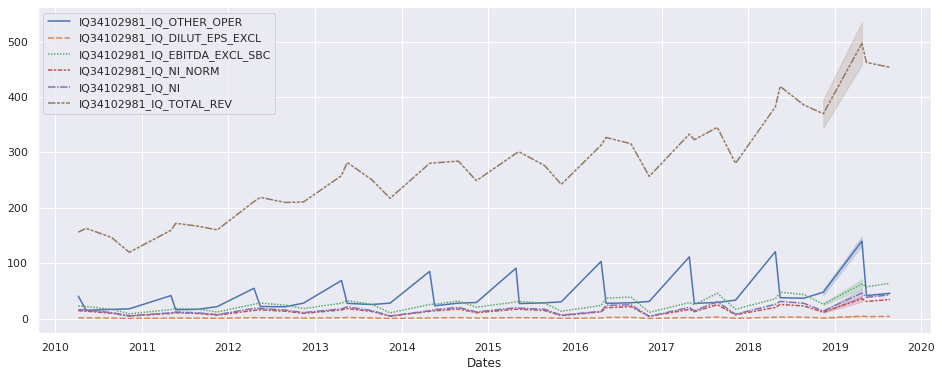

In [247]:
plt.figure(figsize = (16,6))
sns.lineplot(data=df.iloc[:,3:9])
#sns.lineplot(x= df.index,y = df['IQ34102981_IQ_OPER_INC'])
#sns.lineplot(x=df.index,y=df['IQ34102981_IQ_DA_EBITDA'])

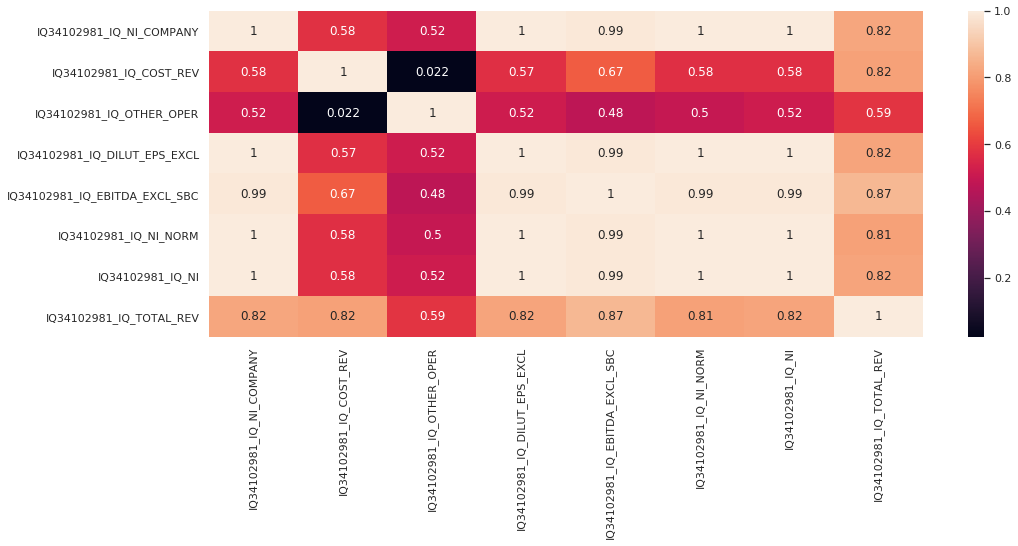

In [246]:
plt.figure(figsize=(16,6))
sns.heatmap(data = df.iloc[:,1:9].corr(),annot = True)

## Strong correlation between IQ_EBITDA_EXCL_5BC AND IQ_NI_COMPANY
## IQ_NI  WITH IQ_NI_NORM , IQ_DILUT_EPS_EXCL , IQ_EBIDTA_EXCL_SBC, ARE STRONGLY CORRELATED 
## IQ_TOTAL_REV  STRONGLY CORRELATED TO EACH VARIABLE EXCEPT IQ_OTHER_OPER